<a href="https://colab.research.google.com/github/noorazra23/Data-Analytics-projects/blob/main/Telco_Customer_ChurnChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TeleCom - Customer Churn**

This project aims to predict customer churn in a telecommunications company using machine learning. Churn refers to the phenomenon where customers discontinue their services, and predicting it allows the company to take proactive measures to retain customers. The dataset includes various customer-related features such as gender, senior citizen status, partner, dependents, tenure, and usage patterns like internet services and streaming.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "/content/Telco-Customer-Churn.csv"
df = pd.read_csv(url)



Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


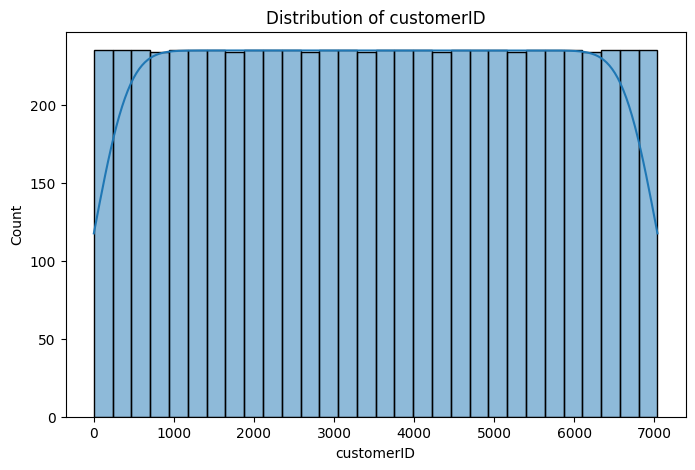

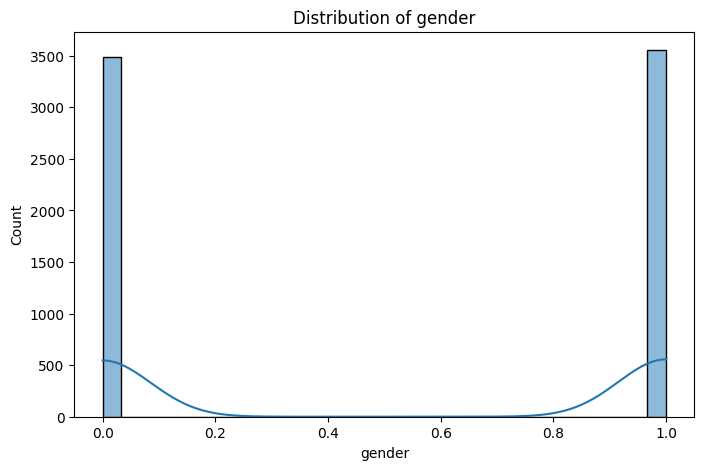

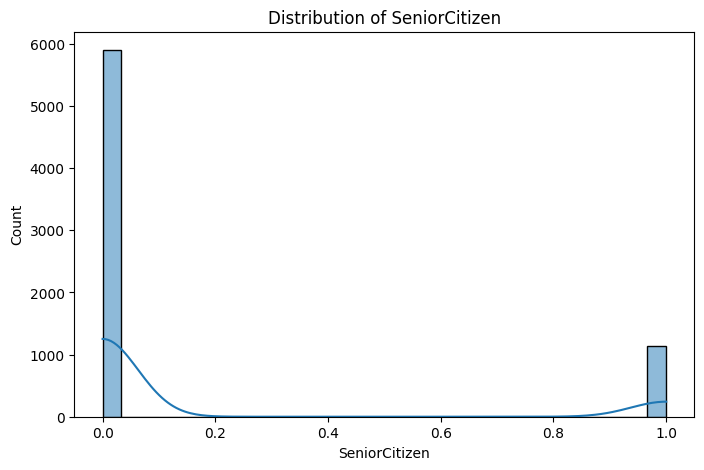

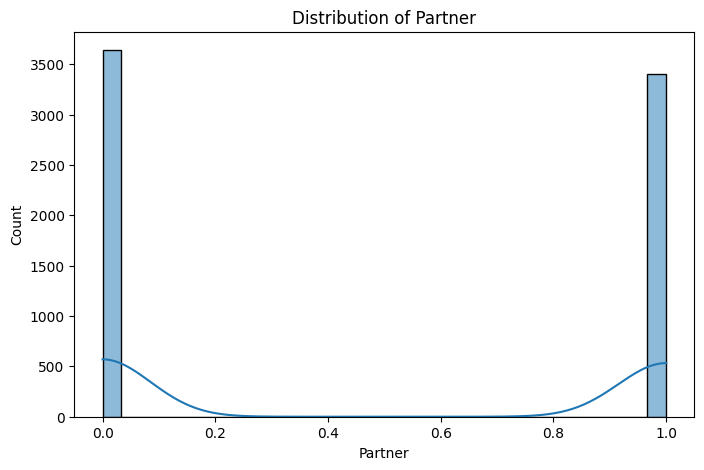

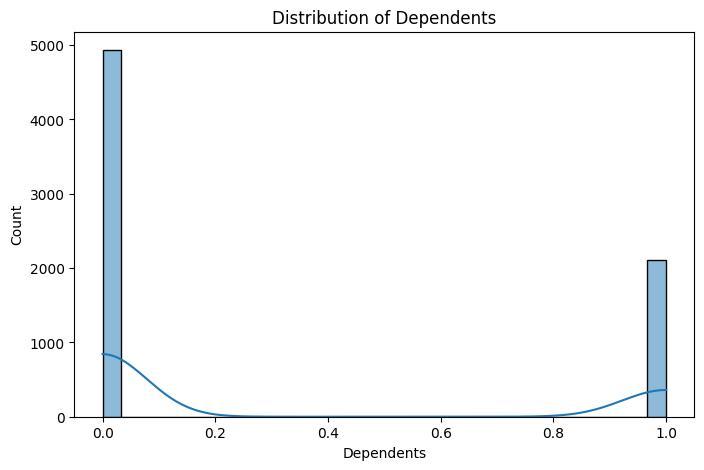

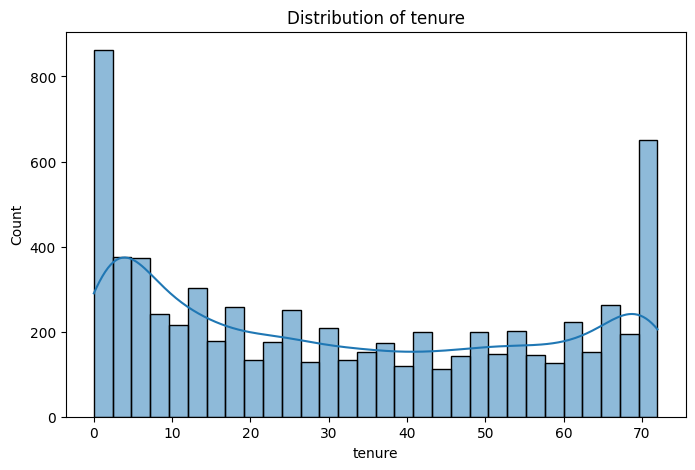

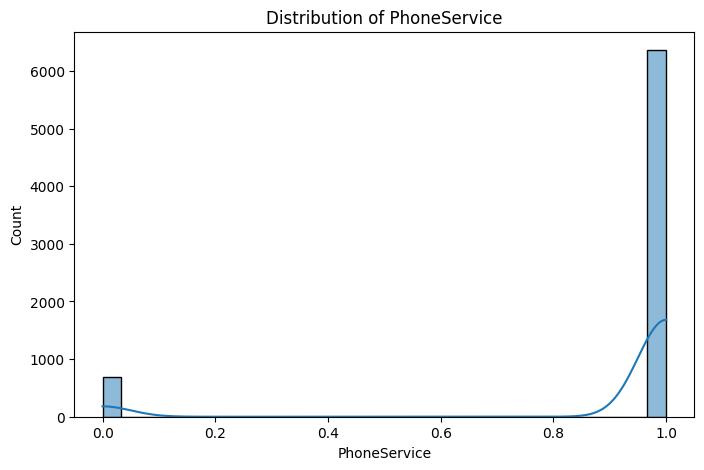

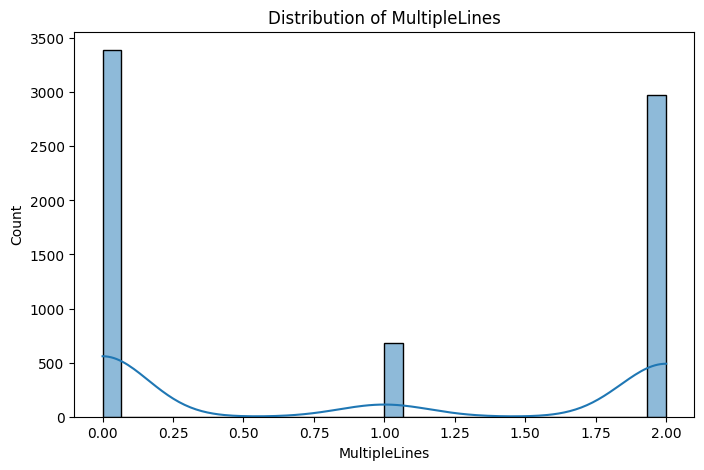

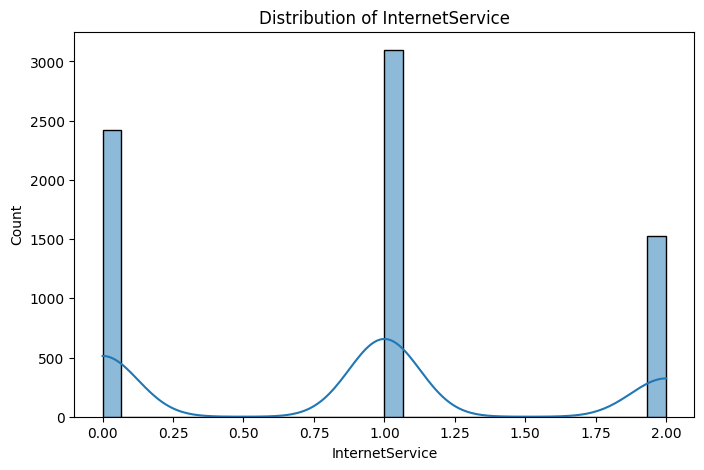

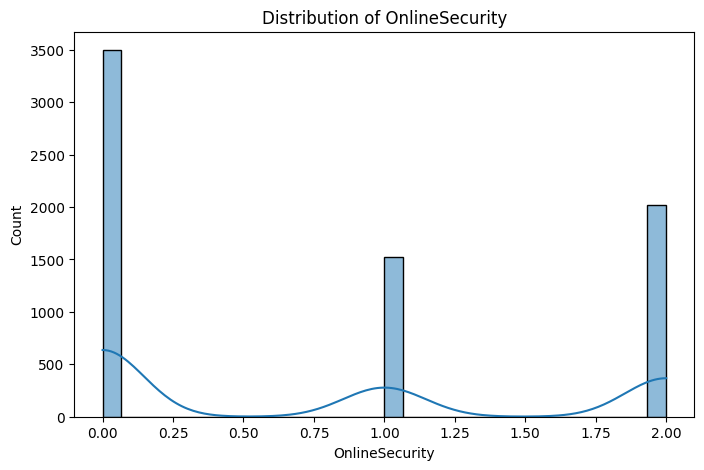

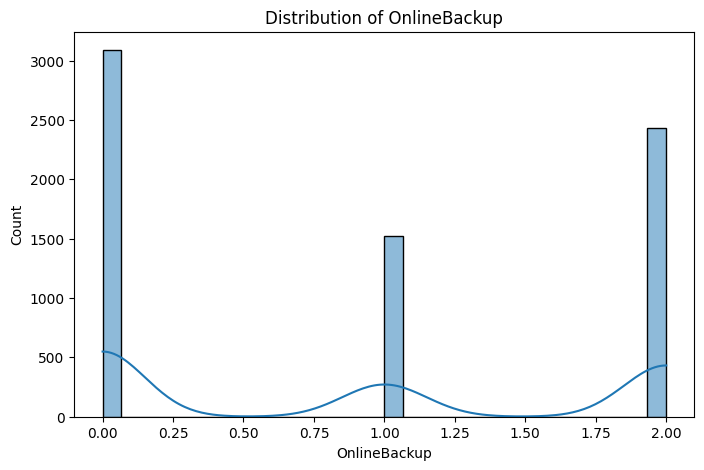

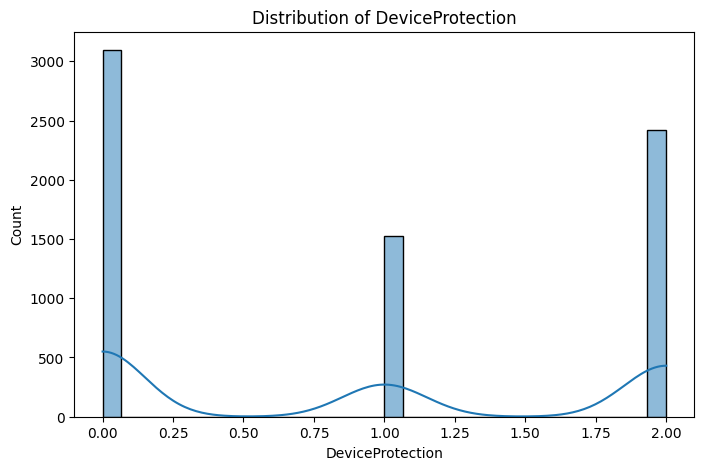

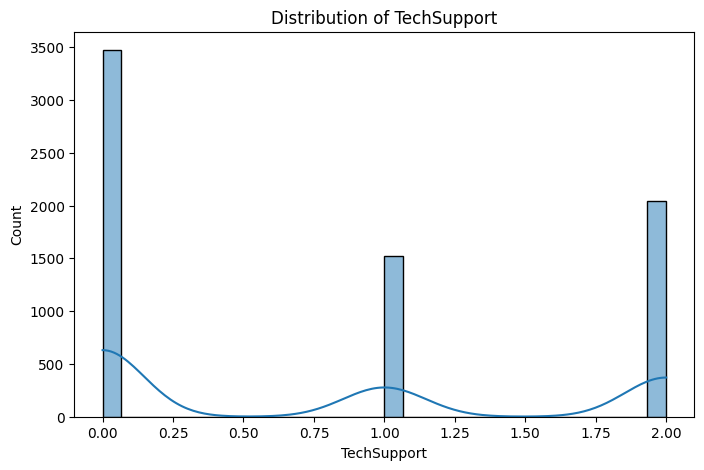

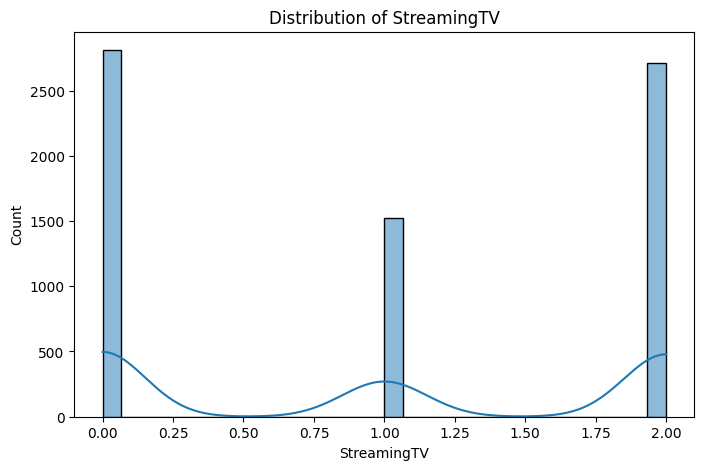

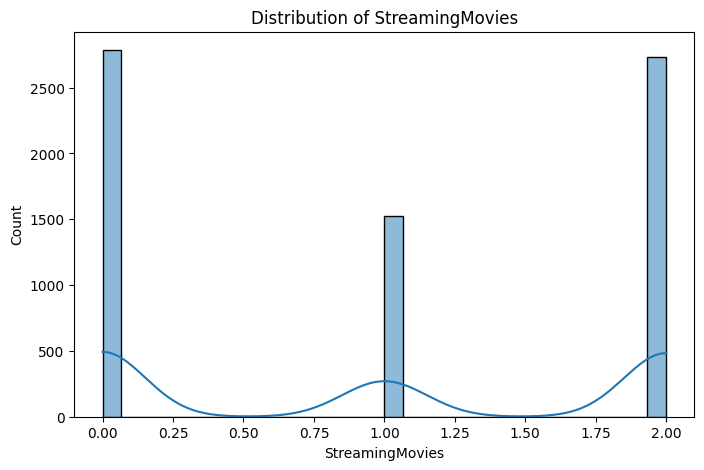

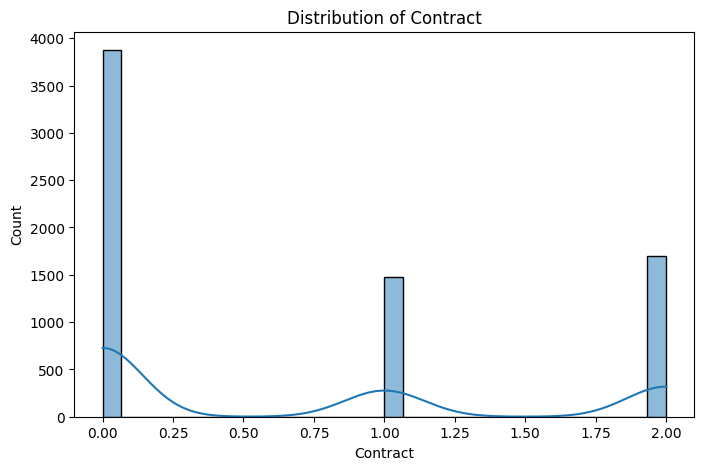

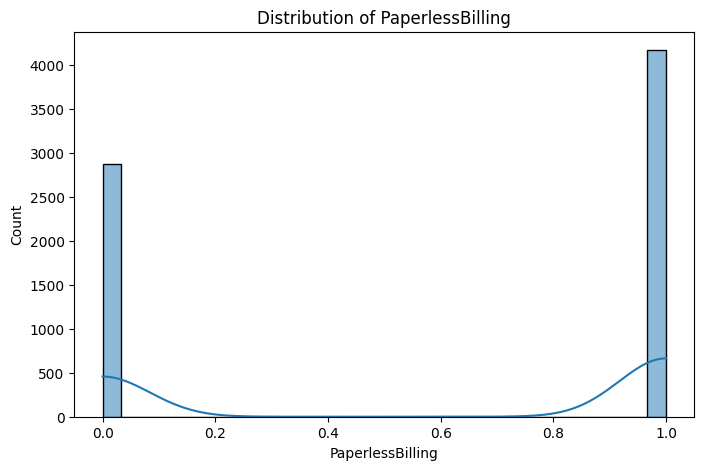

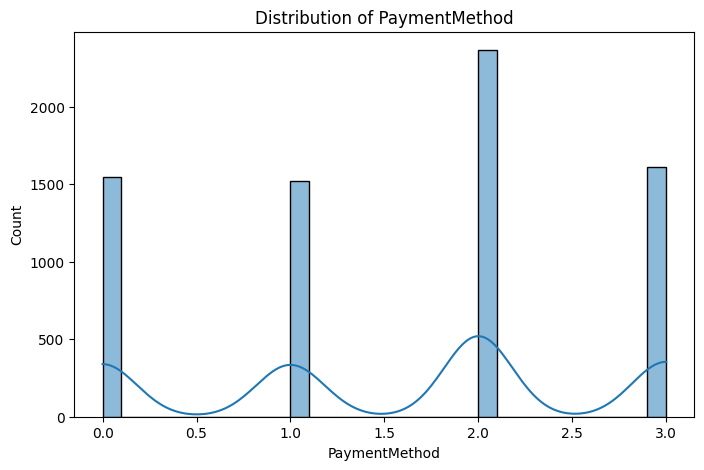

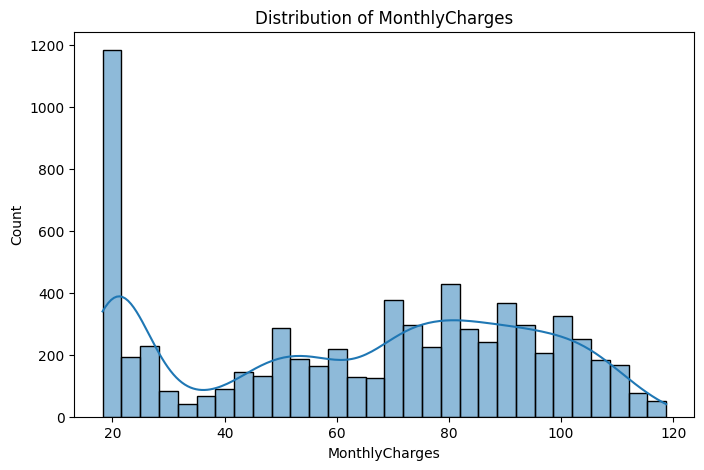

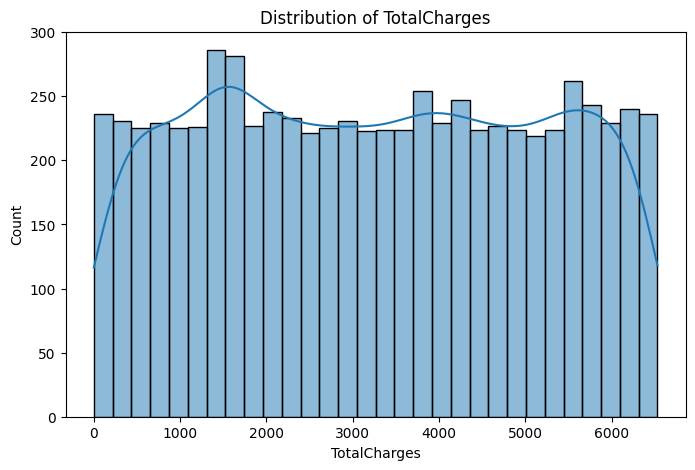

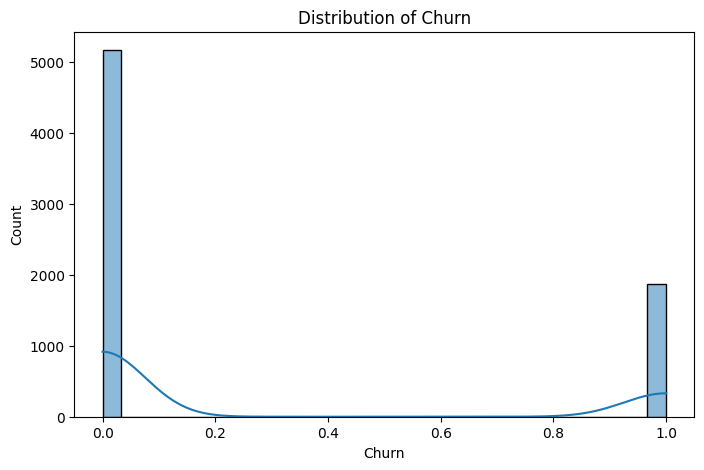

Churn Distribution:
0    5174
1    1869
Name: Churn, dtype: int64


In [ ]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Explore the distribution of each feature
for column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Understand the balance of the target variable (Churn)
churn_distribution = df['Churn'].value_counts()
print("Churn Distribution:")
print(churn_distribution)


# Example: Replace missing numerical values with the mean
df.fillna(df.mean(), inplace=True)

# Feature Engineering

# Create new features based on existing ones if needed
# Example: Calculate the ratio of MonthlyCharges to TotalCharges
df['MonthlyCharges_to_TotalCharges'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1)

# Normalize or scale numerical features
# Example: Use StandardScaler to scale numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

Accuracy: 0.7970191625266146
Confusion Matrix:
[[943  93]
 [193 180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



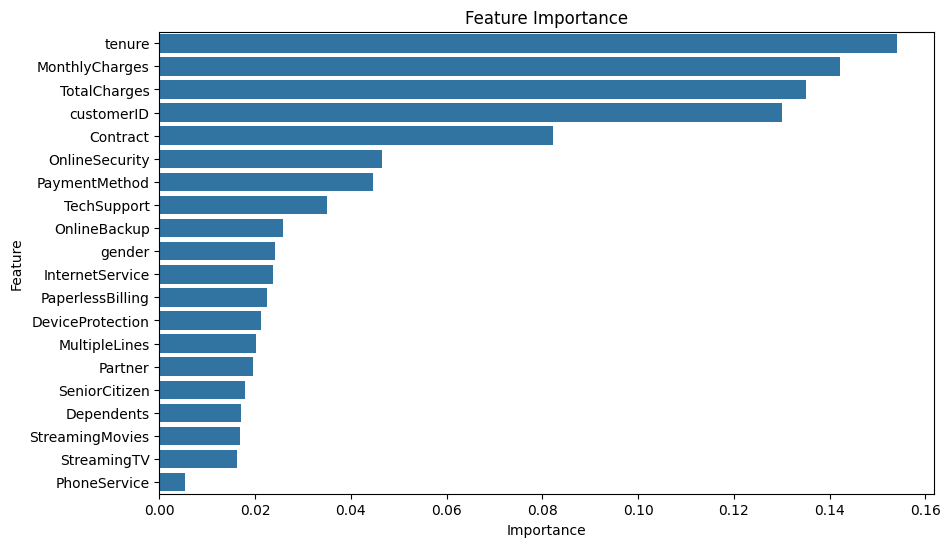

In [ ]:

# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Data Splitting
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Feature Importance Visualization
feature_importance = model.feature_importances_
feature_names = X.columns
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.show()


**CONCLUSION** - This project provides valuable insights into customer churn prediction for the telecom company. The predictive model, along with recommendations, can guide strategic decisions to enhance customer retention. The interactive user interface offers a user-friendly way to leverage the model's predictions. Further refinements and real-world testing are recommended for robust implementation.```

